## Implementation of Clonal selection algorithm using Python.

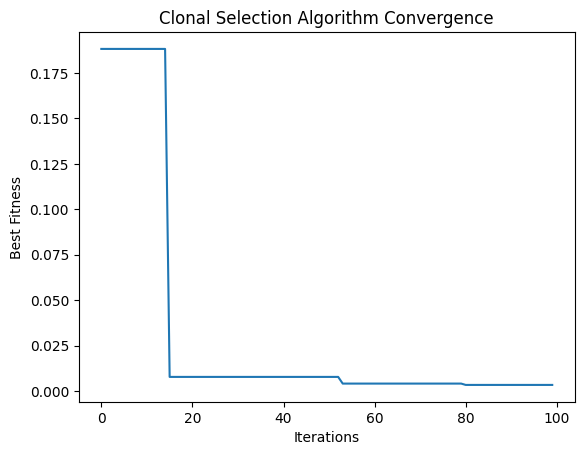

In [6]:
import numpy as np
import random

# Objective Function: Sphere function (minimize sum of squares)
def objective_function(x):
    return sum(xi**2 for xi in x)

# Clonal Selection Algorithm
def clonal_selection(pop_size, dim, mutation_rate, max_iter):
    # Initialize population
    population = np.random.uniform(-5, 5, (pop_size, dim))
    
    best_fitness = []
    
    for _ in range(max_iter):
        # Evaluate fitness
        fitness = np.array([objective_function(ind) for ind in population])
        
        # Select best half
        best_individuals = population[np.argsort(fitness)[:pop_size // 2]]
        
        # Clone and mutate
        clones = best_individuals + np.random.uniform(-1, 1, best_individuals.shape) * (random.random() < mutation_rate)
        
        # Combine population with clones and keep the best
        population = np.vstack([population, clones])
        fitness = np.concatenate([fitness, [objective_function(clone) for clone in clones]])
        
        # Select best individuals
        population = population[np.argsort(fitness)[:pop_size]]
        best_fitness.append(fitness.min())
    
    return best_fitness

# Parameters
pop_size = 20
dim = 2
mutation_rate = 0.1
max_iter = 100

# Run Clonal Selection Algorithm
best_fitness = clonal_selection(pop_size, dim, mutation_rate, max_iter)

# Plot convergence
import matplotlib.pyplot as plt
plt.plot(best_fitness)
plt.title("Clonal Selection Algorithm Convergence")
plt.xlabel("Iterations")
plt.ylabel("Best Fitness")
plt.show()
